# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [3]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Optional: KNN
from sklearn.neighbors import KNeighborsClassifier

##### Decision Tree Visualization ###
#from sklearn.tree import export_graphviz
from sklearn import tree # export_graphviz() method
#import pydotplus # viz stuff
from IPython.display import Image # viz stuff
from sklearn.ensemble import RandomForestClassifier
####################################

######## Evaluation #######
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay

# Optional: baseline comparison
from sklearn.dummy import DummyClassifier
###########################

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# cross-validation
from sklearn.model_selection import cross_val_score

from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import zero_one_loss
from sklearn.neighbors import KNeighborsClassifier

from sklearn.manifold import TSNE

In [4]:
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import DBSCAN
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.loci import LOCI

# Outliers with DIM. RED. to visualize them
- Identify the top 1% outliers: adopt at least three different methods
from different families (e.g., density-based, angle-based…) and
compare the results.
- Visualize the outliers in a 2 or 3d scatter plot using at least one
dimensionality reduction technique.
- Deal with the outliers in a way you see fit, e.g. by removing them from
the dataset or by treating the anomalous variables as missing values
and employing replacement techniques. In this second case, you
should check that the outliers are not outliers anymore. Justify your
choices in every step.

In [5]:
df = pd.read_csv('Data/processed/final_df_standard_scaler_box_cox.csv')

In [6]:
df.head()

,Unnamed: 0,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,key_confidence,mode_confidence,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,mood
0,0,-0.680781,0.162759,1.978201,-1.033140,-0.275068,0.999975,-0.740877,-0.522897,-0.321113,...,0.786251,0.398323,-0.188934,-0.304401,1,8,0,4,german,Sad
1,1,0.940114,0.812539,-1.691805,-0.475462,0.208828,-0.452776,0.240034,-0.532243,-0.511836,...,0.895193,1.134200,1.049266,-0.103532,0,0,1,4,club,Angry
2,2,2.862979,-1.461689,0.695703,-0.302661,-0.941570,-0.366899,-0.962302,0.029763,-0.542764,...,-1.767842,-1.034990,0.092476,-0.222466,0,5,0,4,minimal-techno,Angry
3,3,-0.386216,1.415905,0.655625,0.522074,0.954063,0.919465,-0.792551,-0.532243,-0.689672,...,-0.609825,-0.205755,0.458307,-0.119712,0,0,1,4,hip-hop,Happy
4,4,1.023124,-0.533433,-0.260445,-0.809283,-1.008220,-0.519867,-0.962825,1.703361,-0.642765,...,-1.933273,-1.924633,0.767857,-0.149780,0,6,0,4,minimal-techno,Sad


In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [8]:
moods = df['mood'].unique()
moods

array(['Sad', 'Angry', 'Happy', 'Relaxed'], dtype=object)

In [9]:
df.shape[0]

88554

In [10]:
print(len(df.columns))

23


In [11]:

num =['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'tempo_confidence', 'time_signature_confidence',
         'key_confidence', 'mode_confidence', 'popularity_artist', 'followers_artist', 'popularity']

cat = ['explicit', 'key','mode','time_signature','genre', 'mood']

print(len(num))
print(len(cat))

17
6


In [12]:
df_num = df.drop(cat, axis=1)
X = df_num.values
X

array([[-0.68078075,  0.16275932,  1.97820128, ...,  0.39832288,
        -0.18893352, -0.30440103],
       [ 0.94011429,  0.81253872, -1.69180496, ...,  1.1342    ,
         1.04926639, -0.10353229],
       [ 2.86297857, -1.46168918,  0.695703  , ..., -1.03499004,
         0.09247555, -0.22246595],
       ...,
       [ 0.31696984,  1.50873094, -0.81008739, ...,  0.12374186,
         0.82413914, -0.13013014],
       [ 0.05443177,  1.32307968,  0.48386177, ..., -1.52374425,
         0.20503918, -0.30141698],
       [-0.83818568, -0.44060727, -1.72615759, ..., -0.85376657,
        -1.08944255, -0.30128075]])

In [13]:
X.shape

(88554, 17)

In [14]:
df_sampled_full, __ =  train_test_split(df, test_size=0.5, stratify=df['mood'], random_state=42)
df_num_sampled = df_sampled_full.drop(cat, axis=1)


In [15]:
df_sampled_full.reset_index(drop=True, inplace=True)
df_num_sampled.reset_index(drop=True, inplace=True)

In [16]:
df_num = df.drop(cat, axis=1)
X = df_num.values


In [17]:
# Initialize an empty dictionary to store the mood distribution
mood_distribution = {}

# Calculate mood distribution and store it in the dictionary
for e in moods:
    mood_distribution[e] = df_sampled_full[df_sampled_full['mood'] == e].shape[0] * 100 / df_sampled_full.shape[0]

# Print the dictionary to verify
print(mood_distribution)


{'Sad': 20.911534205117782, 'Angry': 33.80084468234072, 'Happy': 37.16150597375613, 'Relaxed': 8.126115138785375}


In [18]:
# X_sample generation stratifing by MOOD
df_sampled, _ = train_test_split(df_num, test_size=0.8, stratify=df['mood'], random_state=42)
X_sample = df_sampled.values
X_sample.shape

(17710, 17)

In [19]:
_.shape

(70844, 17)

# Dimensionality Reduction

In [20]:
"""
# Set a random seed for reproducibility
np.random.seed(42)
   
subset_size = int(0.2 * X.shape[0])  # 10% of the rows
indices = np.random.choice(X.shape[0], subset_size, replace=False)
X_sample = X[indices]
"""

'\n# Set a random seed for reproducibility\nnp.random.seed(42)\n   \nsubset_size = int(0.2 * X.shape[0])  # 10% of the rows\nindices = np.random.choice(X.shape[0], subset_size, replace=False)\nX_sample = X[indices]\n'

## PCA

In [21]:
from sklearn.decomposition import PCA

# Riduci la dimensionalità utilizzando PCA
pca = PCA(n_components=2)  # Scegli il numero di componenti principali desiderate
X_pca = pca.fit_transform(X)


In [22]:

# Riduci la dimensionalità utilizzando PCA
pca = PCA(n_components=3)  # Scegli il numero di componenti principali desiderate
X_pca_3d = pca.fit_transform(X)


/var/folders/kz/z9pm_78940q0wmly2vd_r41h0000gn/T/ipykernel_23232/2686009907.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='muted', alpha=0.5,  s=5)
/var/folders/kz/z9pm_78940q0wmly2vd_r41h0000gn/T/ipykernel_23232/2686009907.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


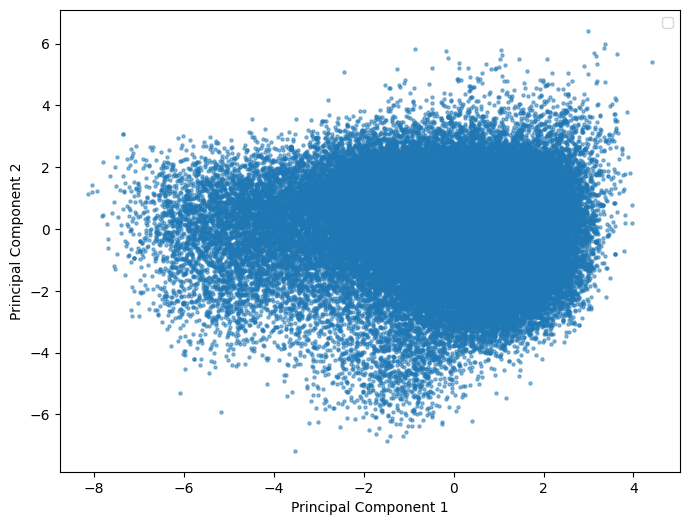

In [23]:
# Plot dei punti ridotti
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='muted', alpha=0.5,  s=5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

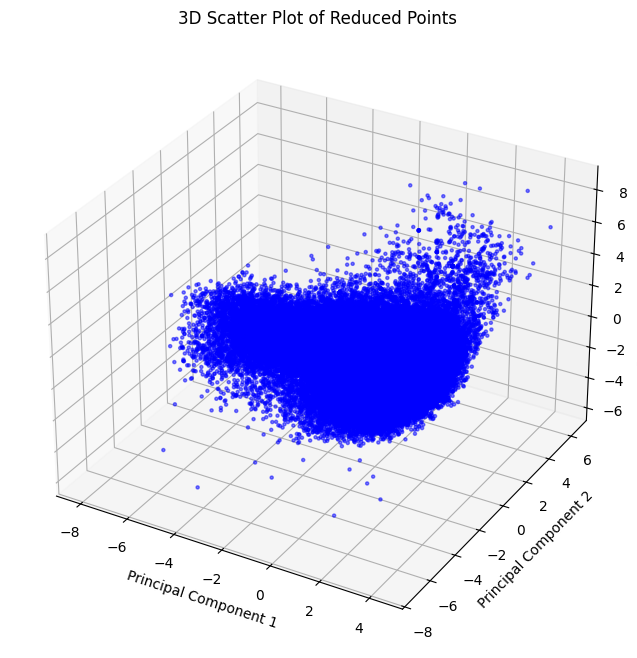

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c='blue', alpha=0.5, s=5)

# Add labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.title('3D Scatter Plot of Reduced Points')
plt.show()

In [25]:
def plot_num(to_plot, title):
    # Select the relevant columns from the DataFrame
    df_num_to_plot = df[to_plot]

    # Determine the number of subplots needed
    num_vars = len(to_plot)
    cols = 3  # Number of columns in the subplot grid
    rows = (num_vars + cols - 1) // cols  # Ceiling division to determine rows

    # Create subplots
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 3 * rows))

    # Flatten axes array for easy iteration in case of single row/column
    axes = axes.flatten() if num_vars > 1 else [axes]

    # Plot each variable
    for i, var in enumerate(df_num_to_plot.columns):
        df_num_to_plot[var].plot(kind="kde", ax=axes[i])
        axes[i].set_title(var)
        axes[i].grid(True)  # Optional: Add grid for better readability

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(title, fontsize=16)  # Adjust font size as needed

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust the top to fit the suptitle
    plt.show()


In [26]:
num =['duration_ms', 'popularity', 'danceability', 'energy',
        'loudness',  'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'popularity_artist','followers_artist']


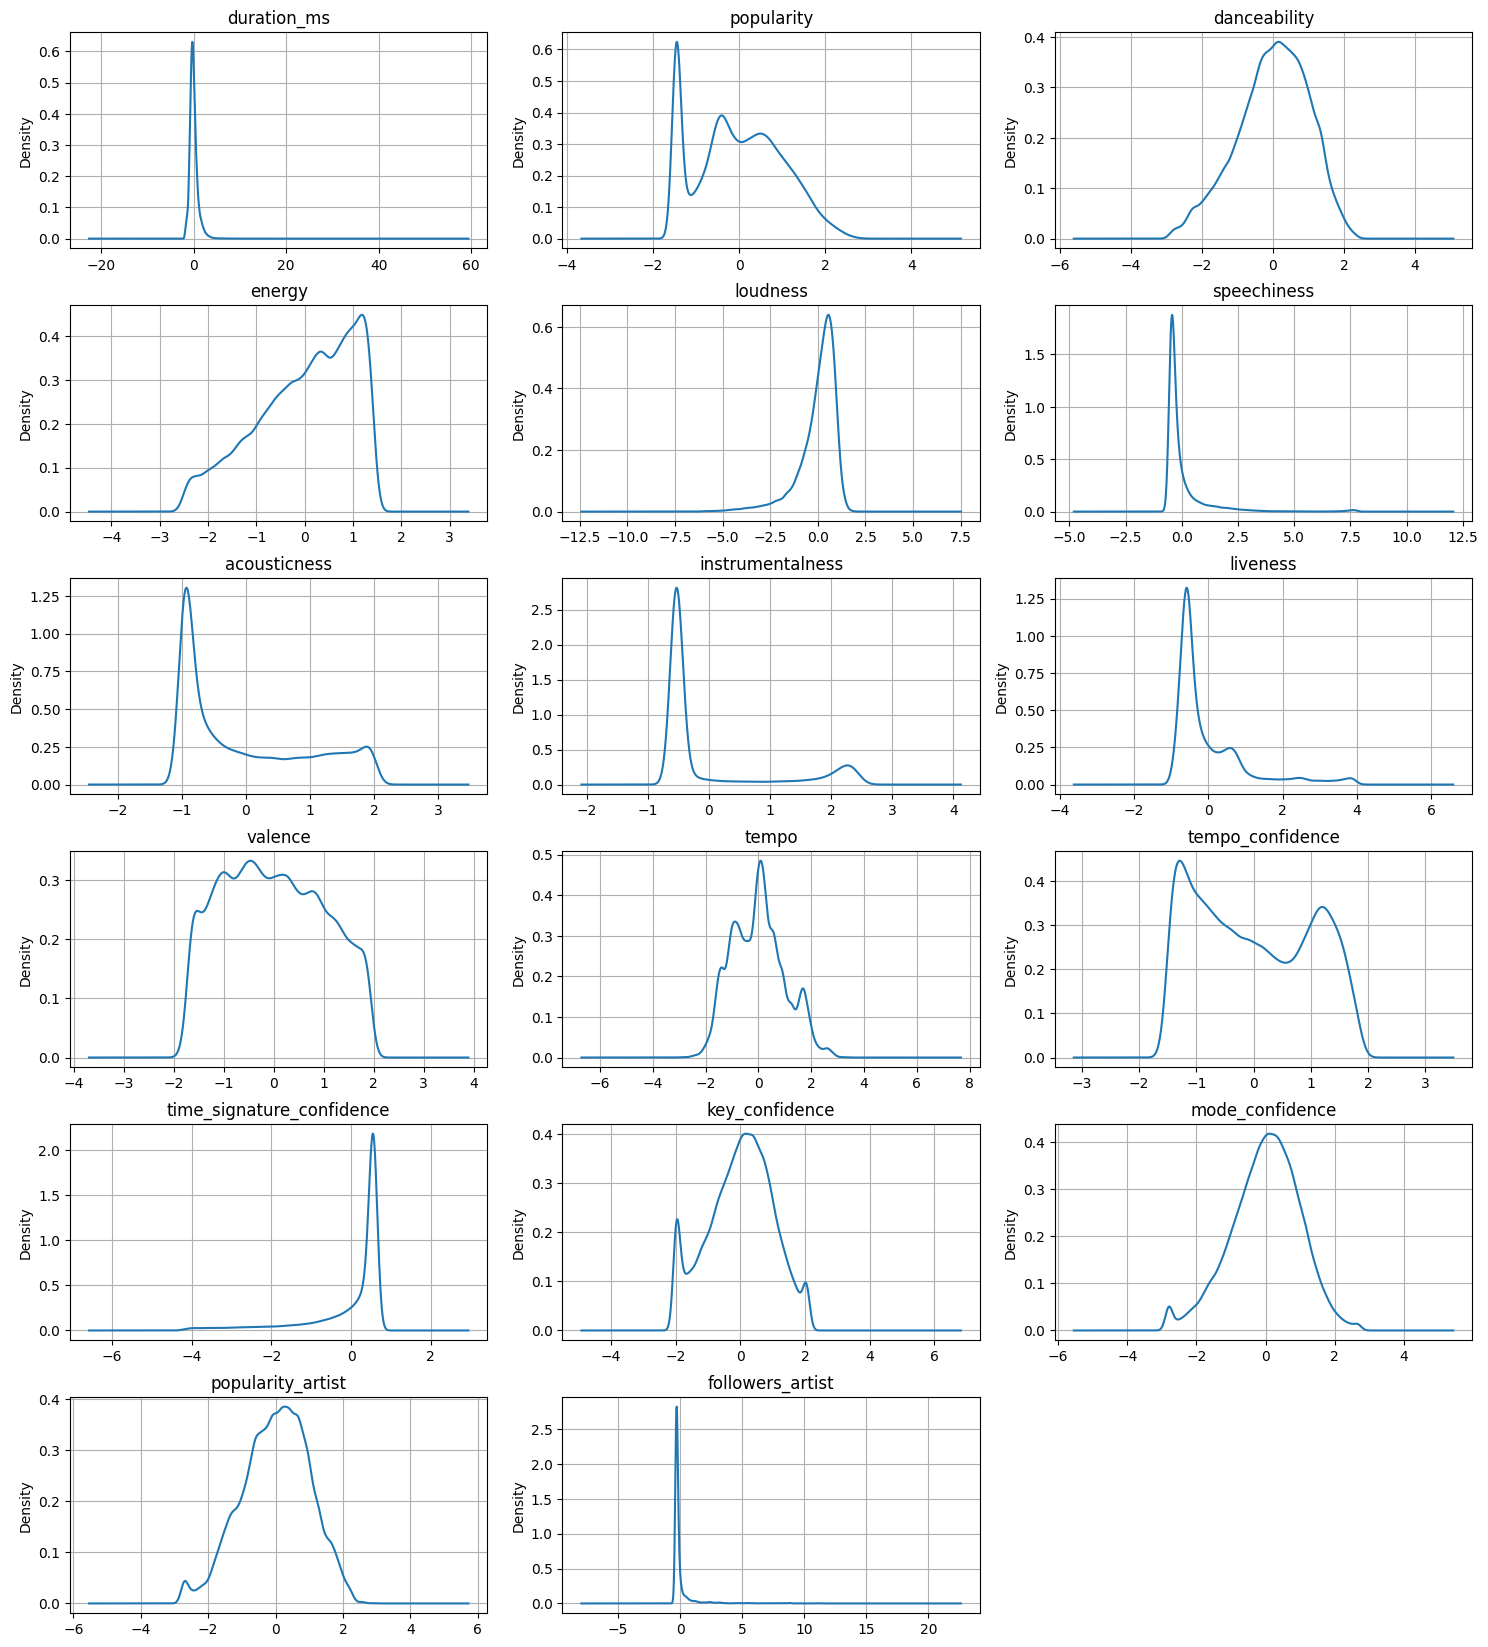

In [27]:
plot_num(num, "")

## TSNE

In [90]:
#tsne = TSNE(n_components=2, perplexity=30, n_iter=500, method='barnes_hut', angle=0.5)
#X_tsne = tsne.fit_transform(X) 


/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/DM2_UNIPI_Prj/env/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [92]:
#np.save('Output_Saved/X_tsne_full.npy', X_tsne)  


In [28]:
X_tsne = np.load('Output_Saved/X_tsne_full.npy')

/var/folders/kz/z9pm_78940q0wmly2vd_r41h0000gn/T/ipykernel_23232/4294685445.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='muted', alpha=0.5,  s=10) # s=10


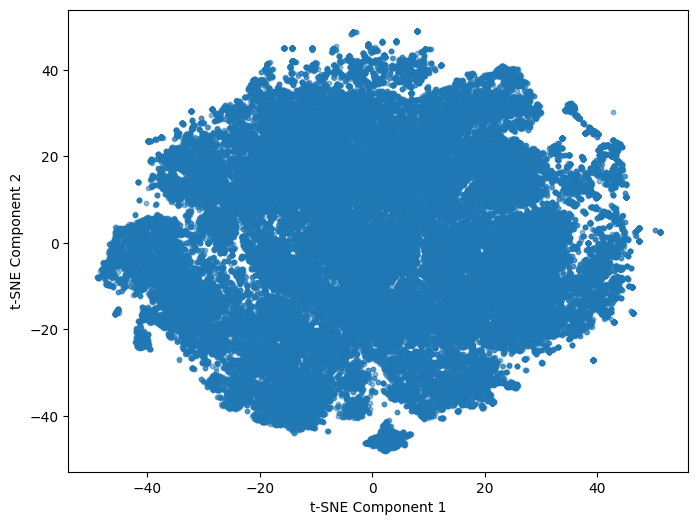

In [29]:
# Plotta i dati t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='muted', alpha=0.5,  s=10) # s=10

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [30]:

"""
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
X_iso = iso.fit_transform(X_sample)
X_iso.shape
"""


'\nfrom sklearn.manifold import Isomap\niso = Isomap(n_components=2)\nX_iso = iso.fit_transform(X_sample)\nX_iso.shape\n'

In [31]:
"""
# Plot ISOMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_iso[:, 0], X_iso[:, 1], cmap='muted', alpha=0.5, s=10)

plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.title('Isomap 2D Projection')
plt.show()
"""

"\n# Plot ISOMAP\nplt.figure(figsize=(8, 6))\nplt.scatter(X_iso[:, 0], X_iso[:, 1], cmap='muted', alpha=0.5, s=10)\n\nplt.xlabel('Isomap Component 1')\nplt.ylabel('Isomap Component 2')\nplt.title('Isomap 2D Projection')\nplt.show()\n"

# Distance Based Approach

In [30]:
from pyod.models.knn import KNN

In [31]:
X.shape

(88554, 17)

In [32]:
%time
clf = KNN(n_neighbors=10, contamination=0.01)
clf.fit(X)

CPU times: user 1 μs, sys: 0 ns, total: 1 μs
Wall time: 4.29 μs


KNN(algorithm='auto', contamination=0.01, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=10, p=2,
  radius=1.0)

In [33]:
%time
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

CPU times: user 1e+03 ns, sys: 1 μs, total: 2 μs
Wall time: 3.81 μs


(array([0, 1]), array([87739,   815]))

In [34]:
i= np.where(outliers == 1) # when comparing arrays of integers
i

(array([  103,   197,   246,   260,   442,   601,  1157,  1190,  1231,
         1449,  1472,  1812,  1846,  1933,  2153,  2335,  2373,  2657,
         2782,  3088,  3254,  3503,  3771,  3910,  3923,  3929,  3985,
         4035,  4078,  4303,  4354,  4395,  4515,  4924,  4933,  5048,
         5106,  5107,  5202,  5261,  5276,  5463,  5474,  5534,  5610,
         5659,  5894,  5913,  5930,  6166,  6447,  6595,  6690,  6904,
         7000,  7316,  7397,  7460,  7563,  7573,  7588,  7592,  7694,
         7876,  7889,  7938,  7949,  8054,  8064,  8155,  8165,  8320,
         8538,  8564,  8800,  8904,  9035,  9215,  9413,  9424,  9669,
         9673,  9776,  9865, 10041, 10129, 10198, 10215, 10222, 10245,
        10262, 10263, 10523, 10825, 10832, 11200, 11315, 11338, 11644,
        11656, 11735, 11799, 11802, 12263, 12317, 12326, 12415, 12541,
        12602, 12702, 12841, 12842, 12975, 13037, 13208, 13264, 13410,
        13486, 13612, 13668, 13839, 13840, 13939, 13997, 14063, 14081,
      

In [35]:
# Ottieni gli indici degli outlier
outlier_knn = np.where(outliers == 1)[0]

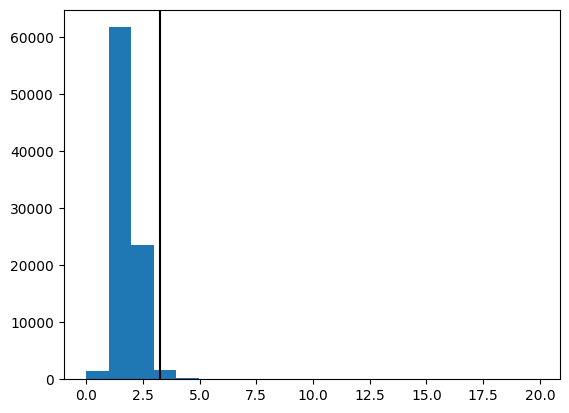

In [36]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [37]:
palette = 'dark'  # 'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind'

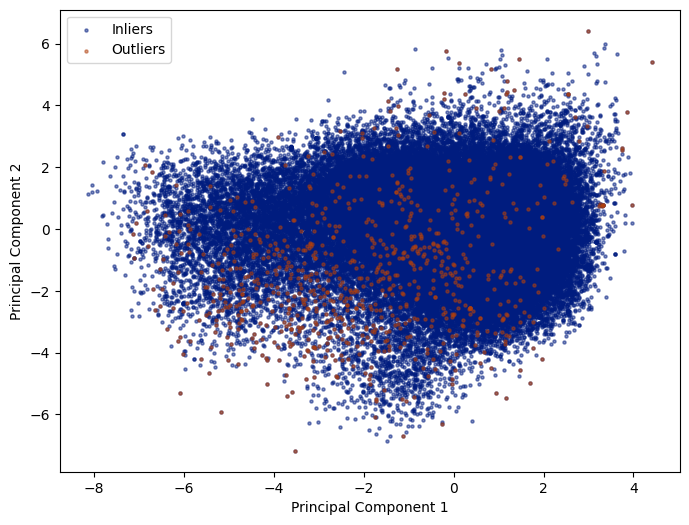

In [38]:
plt.figure(figsize=(8, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=5)
plt.scatter(X_pca[outlier_knn, 0], X_pca[outlier_knn, 1], label='Outliers', color=sns.color_palette(palette)[1],alpha=0.5,  s=5)

#plt.title('PCA plot of outliers detected by KNN')
# Etichette degli assi
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend()
plt.show()


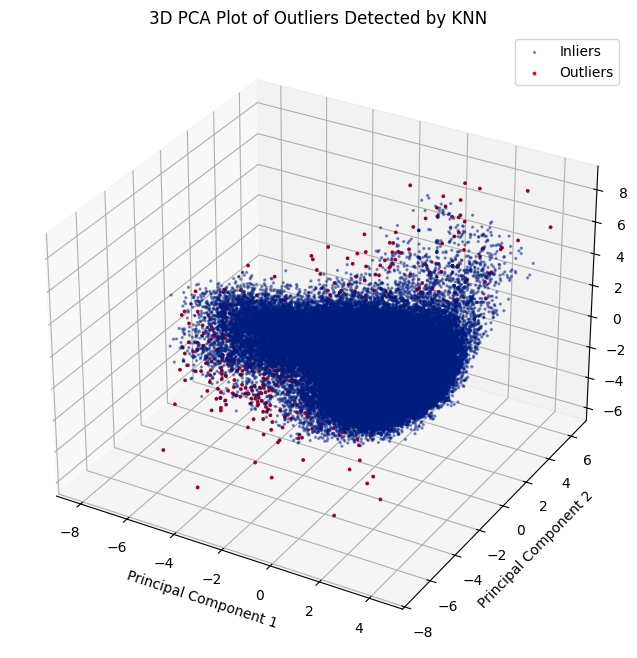

In [39]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot inliers
ax.scatter(
    X_pca_3d[:, 0], 
    X_pca_3d[:, 1], 
    X_pca_3d[:, 2], 
    label='Inliers', 
    color=sns.color_palette(palette)[0], 
    alpha=0.4, 
    s=2
)

# Plot outliers
ax.scatter(
    X_pca_3d[outlier_knn, 0], 
    X_pca_3d[outlier_knn, 1], 
    X_pca_3d[outlier_knn, 2], 
    label='Outliers', 
    color="red", 
    alpha=1, 
    s=3
)

# Add labels and legend
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.title('3D PCA Plot of Outliers Detected by KNN')
plt.show()


In [65]:
X_tsne[:, 0].shape

(85046,)

In [66]:
X_tsne[:, 1].shape

(85046,)

In [67]:
X_tsne

array([[-22.293592 ,  24.47029  ],
       [ 28.508274 ,   7.5220766],
       [-24.417109 , -35.689495 ],
       ...,
       [ 22.288578 ,   6.8562274],
       [ 13.692366 , -10.077017 ],
       [ 18.297558 , -28.28947  ]], dtype=float32)

In [79]:
outlier_knn

array([  103,   197,   246,   260,   442,   601,  1157,  1190,  1231,
        1449,  1472,  1812,  1846,  1933,  2153,  2335,  2373,  2657,
        2782,  3088,  3254,  3503,  3771,  3910,  3923,  3929,  3985,
        4035,  4078,  4303,  4354,  4395,  4515,  4924,  4933,  5048,
        5106,  5107,  5202,  5261,  5276,  5463,  5474,  5534,  5610,
        5659,  5894,  5913,  5930,  6166,  6447,  6595,  6690,  6904,
        7000,  7316,  7397,  7460,  7563,  7573,  7588,  7592,  7694,
        7876,  7889,  7938,  7949,  8054,  8064,  8155,  8165,  8320,
        8538,  8564,  8800,  8904,  9035,  9215,  9413,  9424,  9669,
        9673,  9776,  9865, 10041, 10129, 10198, 10215, 10222, 10245,
       10262, 10263, 10523, 10825, 10832, 11200, 11315, 11338, 11644,
       11656, 11735, 11799, 11802, 12263, 12317, 12326, 12415, 12541,
       12602, 12702, 12841, 12842, 12975, 13037, 13208, 13264, 13410,
       13486, 13612, 13668, 13839, 13840, 13939, 13997, 14063, 14081,
       14298, 14374,

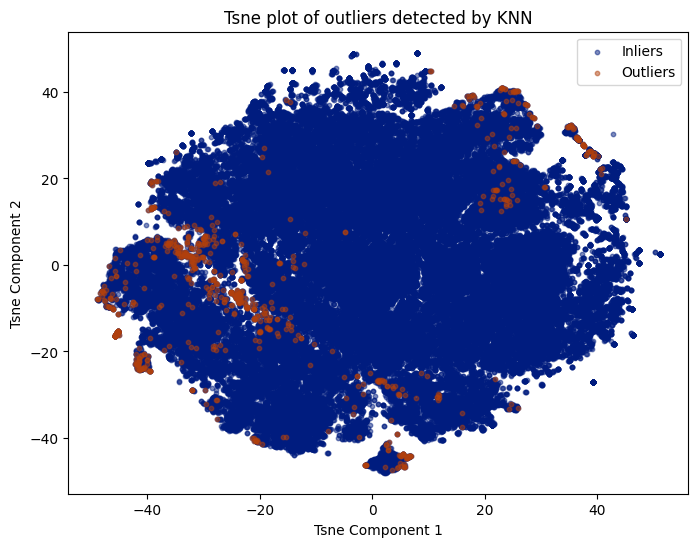

In [40]:
# TSNE plot
plt.figure(figsize=(8, 6))

# Plot inliers
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label='Inliers', color=sns.color_palette(palette)[0], alpha=0.5, s=10)

# Plot outliers
plt.scatter(X_tsne[outlier_knn, 0], X_tsne[outlier_knn, 1], label='Outliers', color=sns.color_palette(palette)[1], alpha=0.5, s=10)

plt.xlabel('Tsne Component 1')
plt.ylabel('Tsne Component 2')
plt.legend()
plt.title('Tsne plot of outliers detected by KNN')
plt.show()


# Angle Based Approach

In [41]:
from pyod.models.abod import ABOD

In [42]:
clf = ABOD(contamination=0.01, n_neighbors= 50, method='fast')
clf.fit(X)

ABOD(contamination=0.01, method='fast', n_neighbors=50)

In [43]:
import joblib

# Save the model
joblib.dump(clf, 'Output_Saved/abod_model.joblib')


['Output_Saved/abod_model.joblib']

In [44]:
clf = joblib.load('Output_Saved/abod_model.joblib')

In [45]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([87679,   875]))

In [46]:
np.save('Output_Saved/abod_model_prediction.npy', outliers)

In [47]:
outliers = np.load('Output_Saved/abod_model_prediction.npy')

In [48]:
outlier_abod = np.where(outliers == 1)[0]
print(len(outlier_abod))

875


In [ ]:
X_tsne.shape

(88554, 2)

In [ ]:
X_pca.shape

(88554, 2)

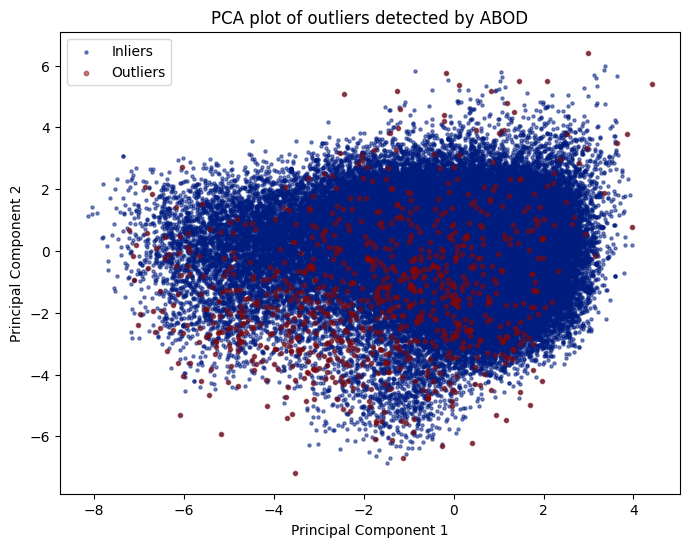

In [49]:
# Plot dei punti ridotti
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=5)
plt.scatter(X_pca[outlier_abod, 0], X_pca[outlier_abod, 1], label='Outliers', color=sns.color_palette(palette)[3],  alpha=0.5,  s=10)
plt.title('PCA plot of outliers detected by ABOD')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

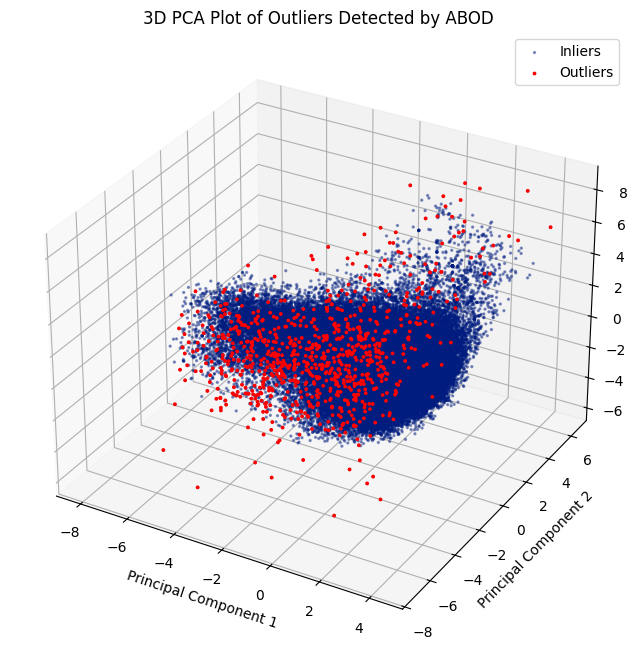

In [61]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot inliers
ax.scatter(
    X_pca_3d[:, 0], 
    X_pca_3d[:, 1], 
    X_pca_3d[:, 2], 
    label='Inliers', 
    color=sns.color_palette(palette)[0], 
    alpha=0.4, 
    s=2
)

# Plot outliers
ax.scatter(
    X_pca_3d[outlier_abod, 0], 
    X_pca_3d[outlier_abod, 1], 
    X_pca_3d[outlier_abod, 2], 
    label='Outliers', 
    color="red", 
    alpha=1, 
    s=3
)

# Add labels and legend
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.title('3D PCA Plot of Outliers Detected by ABOD')
plt.show()


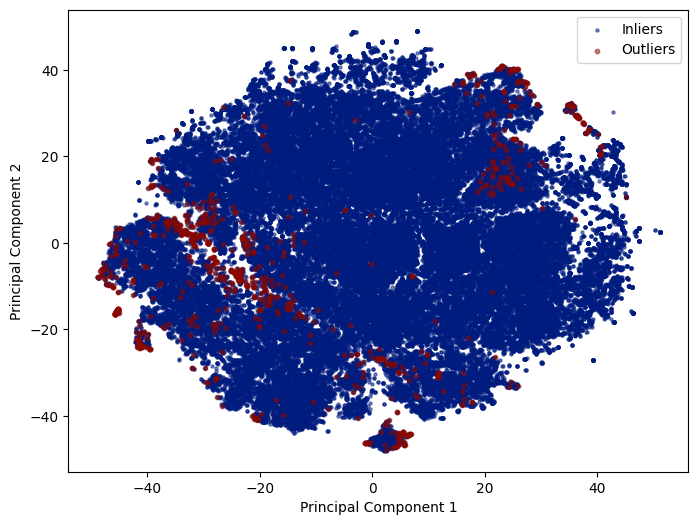

In [50]:

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=5)
plt.scatter(X_tsne[outlier_abod, 0], X_tsne[outlier_abod, 1], label='Outliers', color=sns.color_palette(palette)[3],  alpha=0.5,  s=10)
#plt.title('t-sne plot of outliers detected by KNN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Density Based Approach

In [51]:
from pyod.models.lof import LOF

In [52]:
clf = LOF(n_neighbors=10, contamination=0.01)
clf.fit(X)

LOF(algorithm='auto', contamination=0.01, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=10, novelty=True, p=2)

In [53]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([87857,   697]))

In [54]:
# Ottieni gli indici degli outlier
outlier_lof = np.where(outliers == 1)[0]

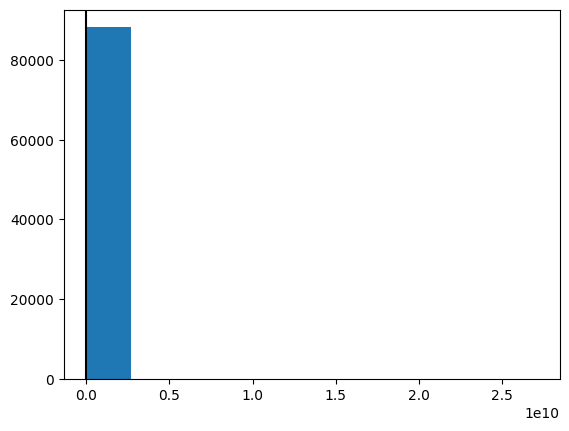

In [55]:
plt.hist(clf.decision_scores_, bins=10)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

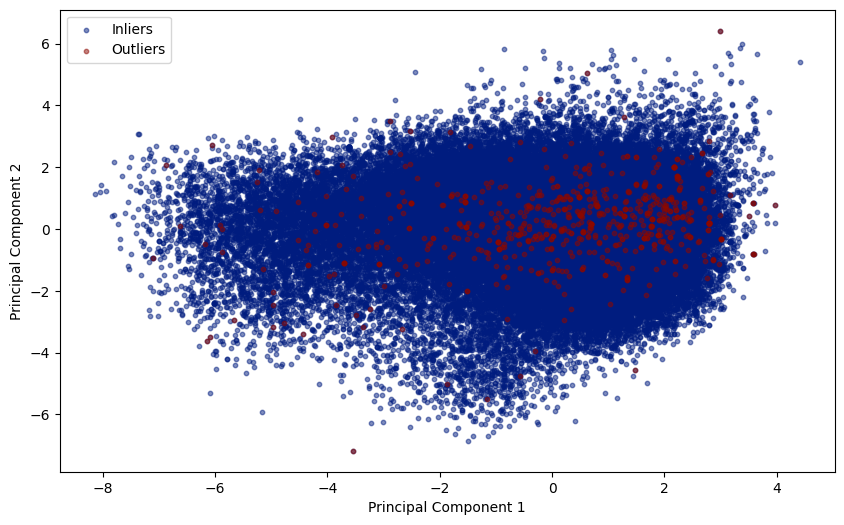

In [56]:
# Plot dei punti ridotti
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=10)
plt.scatter(X_pca[outlier_lof, 0], X_pca[outlier_lof, 1], label='Outliers',color=sns.color_palette(palette)[3],  alpha=0.5,  s=10)
#plt.title('PCA plot of outliers detected by LOF')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


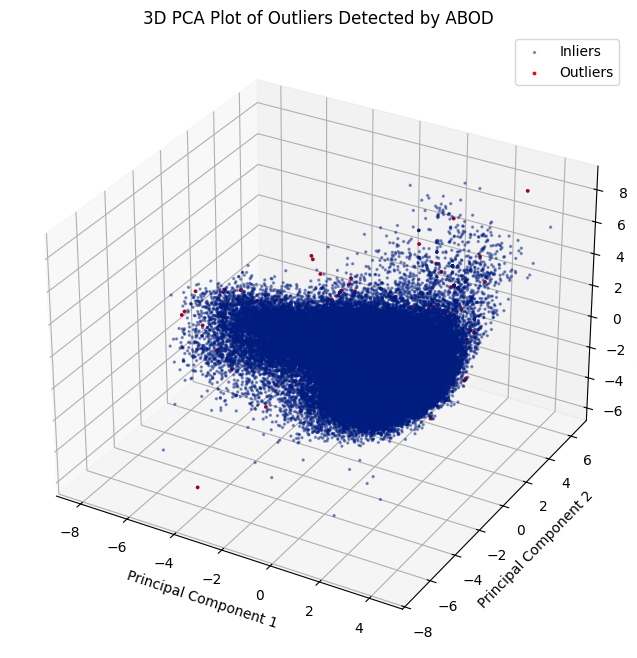

In [62]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot inliers
ax.scatter(
    X_pca_3d[:, 0], 
    X_pca_3d[:, 1], 
    X_pca_3d[:, 2], 
    label='Inliers', 
    color=sns.color_palette(palette)[0], 
    alpha=0.4, 
    s=2
)

# Plot outliers
ax.scatter(
    X_pca_3d[outlier_lof, 0], 
    X_pca_3d[outlier_lof, 1], 
    X_pca_3d[outlier_lof, 2], 
    label='Outliers', 
    color="red", 
    alpha=1, 
    s=3
)

# Add labels and legend
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.title('3D PCA Plot of Outliers Detected by ABOD')
plt.show()


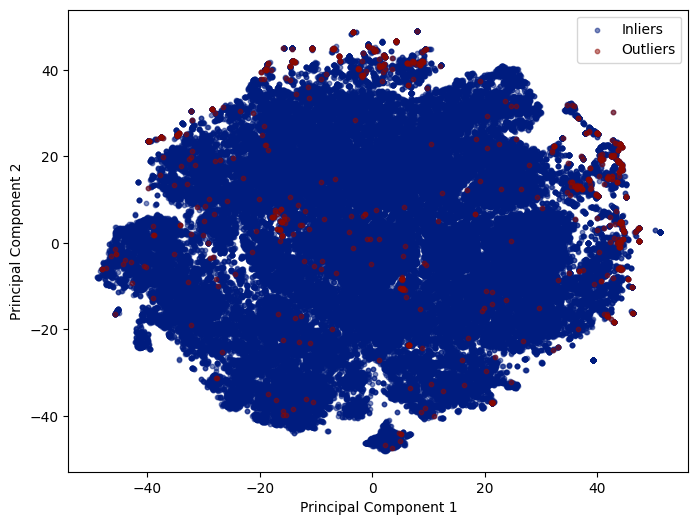

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=10)
plt.scatter(X_tsne[outlier_lof, 0], X_tsne[outlier_lof, 1], label='Outliers', color=sns.color_palette(palette)[3],  alpha=0.5,  s=10)
#plt.title('t-sne plot of outliers detected by KNN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Sum Up

In [58]:
# indici di tutti gli outliers trovati
print(len(outlier_abod))
print(len(outlier_lof))
print(len(outlier_knn))
print()
#print(len(outlier_ee))
#print(len(outlier_if))

875
697
815



In [59]:
# Trova gli indici comuni
outliers_comuni =  set(outlier_lof) & set(outlier_knn) & set(outlier_abod)
print(len(outliers_comuni))

# Trasformare il set in un array numpy
outliers_comuni = np.array(list(outliers_comuni))


70


In [65]:
df_out = df.copy()

In [66]:
df_out.columns

Index(['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'popularity_artist',
       'followers_artist', 'explicit', 'key', 'mode', 'time_signature',
       'genre', 'mood'],
      dtype='object')

In [67]:
# Crea una nuova colonna nel dataframe df per gli outliers
df_out['outlier'] = 0

# Imposta 1 nella colonna 'outlier' per le righe che sono outliers comuni
df_out.loc[list(outliers_comuni), 'outlier'] = 1
df_out

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,mode_confidence,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,mood,outlier
0,-0.680781,0.162759,1.978201,-1.033140,-0.275068,0.999975,-0.740877,-0.522897,-0.321113,-0.151292,...,0.398323,-0.188934,-0.304401,1,8,0,4,german,Sad,0
1,0.940114,0.812539,-1.691805,-0.475462,0.208828,-0.452776,0.240034,-0.532243,-0.511836,-0.498399,...,1.134200,1.049266,-0.103532,0,0,1,4,club,Angry,0
2,2.862979,-1.461689,0.695703,-0.302661,-0.941570,-0.366899,-0.962302,0.029763,-0.542764,-1.387148,...,-1.034990,0.092476,-0.222466,0,5,0,4,minimal-techno,Angry,0
3,-0.386216,1.415905,0.655625,0.522074,0.954063,0.919465,-0.792551,-0.532243,-0.689672,1.401157,...,-0.205755,0.458307,-0.119712,0,0,1,4,hip-hop,Happy,0
4,1.023124,-0.533433,-0.260445,-0.809283,-1.008220,-0.519867,-0.962825,1.703361,-0.642765,-0.906537,...,-1.924633,0.767857,-0.149780,0,6,0,4,minimal-techno,Sad,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88549,0.962328,1.508731,1.153738,-1.001721,-0.590779,-0.490347,1.107203,-0.527803,-0.305649,0.764157,...,0.200625,0.852280,-0.113375,0,7,0,4,pop-film,Relaxed,0
88550,-1.191927,-0.022892,-0.203191,-2.467431,-4.644748,-0.255080,1.992191,2.445458,-0.642765,0.146229,...,2.688329,-1.033161,-0.306613,0,10,1,4,disney,Relaxed,0
88551,0.316970,1.508731,-0.810087,-1.088122,-0.199843,-0.447409,1.196296,-0.532243,-0.573692,-0.689118,...,0.123742,0.824139,-0.130130,0,3,1,4,mandopop,Sad,0
88552,0.054432,1.323080,0.483862,0.773421,-0.584153,-0.425045,-0.169793,2.361622,-0.612868,-1.226944,...,-1.523744,0.205039,-0.301417,0,10,0,4,electronic,Angry,0


In [68]:
df_out[df_out['outlier'] == 1]


,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,mode_confidence,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,mood,outlier
246,-1.287597,-1.229625,-2.373132,-2.492448,-5.286500,2.753295,1.122052,2.516873,-0.542764,-1.799100,...,-2.567152,0.880421,-0.300531,0,2,1,4,sleep,Sad,1
260,-0.137328,2.344162,1.296874,-1.453361,-0.694652,-0.408943,1.035929,1.125830,-0.589156,0.275918,...,-1.683001,1.161830,-0.128437,0,5,1,4,indie-pop,Relaxed,1
3985,-1.698577,1.462318,0.243393,-1.107758,-1.253968,6.626700,1.849643,-0.531370,2.524267,1.877954,...,-0.628610,1.218112,1.780202,0,5,1,4,k-pop,Relaxed,1
8155,-1.642628,0.580475,-0.878793,-2.434010,-6.745008,6.045242,-0.965468,2.302627,-0.444825,0.607768,...,-2.023482,-0.357779,-0.306264,0,8,1,4,world-music,Relaxed,1
9413,0.603610,1.183841,-1.382631,-0.864265,-2.013429,1.894526,1.644729,2.147377,0.684049,-1.104884,...,0.887077,-0.245215,-0.304601,1,1,1,4,indian,Sad,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84572,3.643828,1.740795,-2.927355,-2.501873,-1.863564,-0.058279,-0.965685,0.334054,1.034566,-1.799062,...,-2.803292,1.499521,-0.302479,0,8,0,4,sleep,Sad,1
85404,2.395320,0.580475,-0.689853,-2.501675,0.199279,2.645948,-0.110398,-0.531836,0.823225,-0.700561,...,-2.578135,0.599012,-0.101766,0,5,0,4,r-n-b,Sad,1
86516,0.309455,1.555144,-1.033380,0.632038,0.388511,3.102169,-0.624166,-0.532243,-0.181937,-1.242202,...,0.398323,2.174903,8.818926,0,9,0,4,k-pop,Angry,1
86901,0.048556,2.669051,1.491539,0.058652,1.023052,-0.062752,0.759742,-0.532243,-0.635033,1.752079,...,0.749787,2.174903,14.970662,0,1,0,4,pop,Happy,1


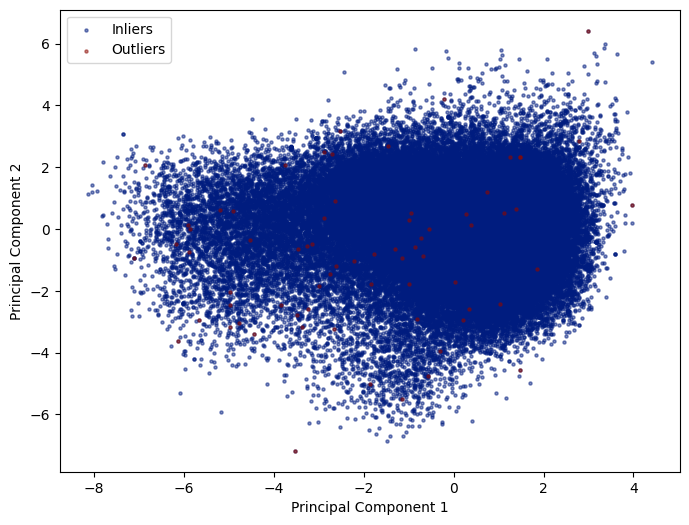

In [69]:
# Plot dei punti ridotti
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=5)
plt.scatter(X_pca[outliers_comuni, 0], X_pca[outliers_comuni, 1], label='Outliers', color=sns.color_palette(palette)[3],  alpha=0.5,  s=5)
#plt.title('PCA plot of outliers detected by LOF')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


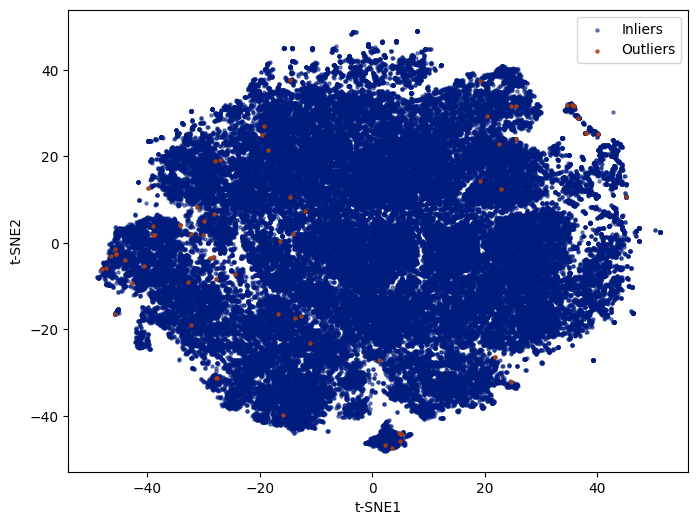

In [70]:
palette = 'dark'  # 'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind'

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label='Inliers', color=sns.color_palette(palette)[0],  alpha=0.5,  s=5)
plt.scatter(X_tsne[outliers_comuni, 0], X_tsne[outliers_comuni, 1], label='Outliers', color=sns.color_palette(palette)[1],  alpha=0.8, s=5) #0.8 e 30
#plt.title('t-sne plot of outliers detected by KNN')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend()
plt.show()

In [71]:
result_df = pd.DataFrame()

# Aggiunta della colonna 'emotion' al risultato
result_df['mood'] = df_out['mood']

# Funzione per etichettare le righe come outlier o non-outlier
def label_outlier(row_index, outlier_array):
    if row_index in outlier_array:
        return 1
    else:
        return 0

# Applicazione della funzione per etichettare le righe
result_df['outlier_abod'] = df.index.map(lambda x: label_outlier(x, outlier_abod))
result_df['outlier_lof'] = df.index.map(lambda x: label_outlier(x, outlier_lof))
result_df['outlier_knn'] = df.index.map(lambda x: label_outlier(x, outlier_knn))


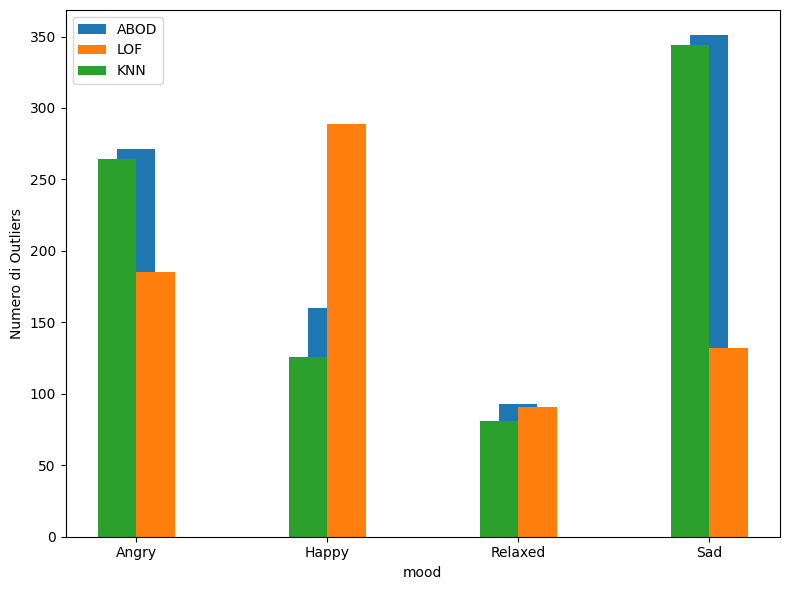

In [72]:
import matplotlib.pyplot as plt

# Gruppo per 'emotion' e conteggio degli outliers per ogni metodo
outlier_counts = result_df.groupby('mood').agg({
    'outlier_abod': lambda x: (x == 1).sum(),
    'outlier_lof': lambda x: (x == 1).sum(),
    'outlier_knn': lambda x: (x == 1).sum()
})

# Creazione del plot
plt.figure(figsize=(8, 6))

# Plot degli istogrammi per ciascun metodo
plt.bar(outlier_counts.index, outlier_counts['outlier_abod'], width=0.2, align='center', label='ABOD')
plt.bar(outlier_counts.index, outlier_counts['outlier_lof'], width=0.2, align='edge', label='LOF')
plt.bar(outlier_counts.index, outlier_counts['outlier_knn'], width=-0.2, align='edge', label='KNN')

# Impostazione dei titoli e delle etichette
#plt.title('Numero di Outliers per Emotion e Metodo')
plt.xlabel('mood')
plt.ylabel('Numero di Outliers')
plt.legend()

# Mostra il plot
plt.tight_layout()
plt.show()


In [266]:
len(outliers_comuni)

1306

In [267]:
mood_distribution

{'Sad': 21.026268137243374,
 'Angry': 34.19326011805376,
 'Happy': 36.83418385344402,
 'Relaxed': 7.946287891258848}

In [286]:
df_out.columns

Index(['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'popularity_artist',
       'followers_artist', 'explicit', 'key', 'mode', 'time_signature',
       'genre', 'mood', 'outlier'],
      dtype='object')

# Additional Data Prep

In [73]:
# Rimuovi le righe con 'outliers' uguale a 1
print(df_out.shape)
df_final = df_out[df_out['outlier'] != 1]
print(df_final.shape)

(88554, 24)
(88484, 24)


In [74]:
to_drop = ['outlier']
df_final = df_final.drop(to_drop,axis=1)
print(df_final.shape)

(88484, 23)


In [75]:
df_final.to_csv('df_wout_outliers.csv')